## 1단계 : 라이브러리 import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2단계 : Data Load

In [58]:
# mnist의 fashion datasets 객체를 불러옴
fashion_mnist = tf.keras.datasets.fashion_mnist
# 데이터 로드해서 언패킹
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터셋에 클래스 이름이 들어있지 않기 때문에, 별도의 변수로 저장
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Avkle boot']

## 3단계 : 데이터 형식 확인

In [59]:
# train datasets
print(train_images.shape)	# 60000개의 데이터 28행 28열
print(len(train_labels))	# train_labels의 개수
print(train_labels)			# train_labels 데이터 출력

# test datasets
print(test_images.shape)	# 60000개의 데이터 28행 28열
print(len(test_labels))		# test_labels의 개수
print(test_labels)			# test_labels 데이터 출력

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


## 4단계 : 이미지 확인

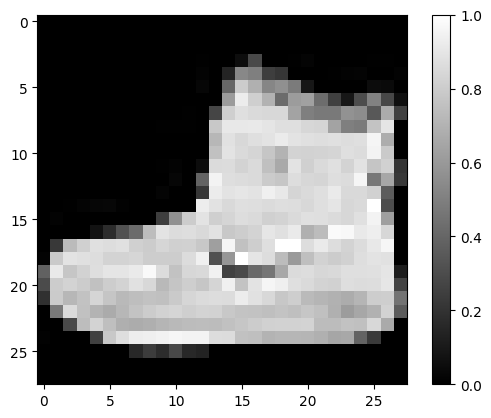

In [ ]:
# 새 그래프 공간을 생성
plt.figure()
# 이미지를 그림
plt.imshow(train_images[0])
# 컬러 스케일바를 표시함
plt.colorbar()
# grid 옵션 False (grid가 없어야 잘 보이니까)
plt.grid(False)
# 이미지 표시
plt.show()


## 5단계 : 이미지 전처리 후 비교

학습에 용이하도록 0~255의 범위를 0~1로 줄임

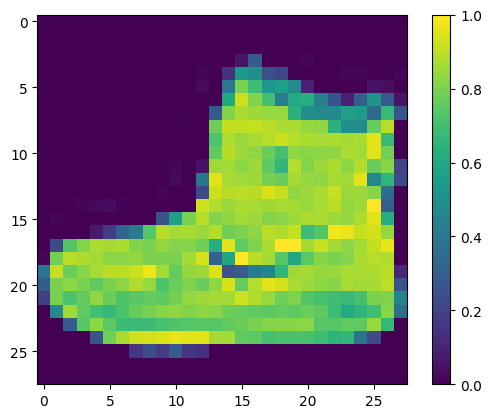

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 비교를 위해 이미지를 띄움 (데이터의 질은 변화 없다는 것을 알 수 있음)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 6단계 : Model 생성

In [63]:
model = tf.keras.Sequential([
    # 28*28 numpy 배열을 1차원으로 flatten함
	tf.keras.layers.Flatten(input_shape=(28,28)),
 	tf.keras.layers.Dense(32, activation='relu'),
	# 분류 문제니까 활성함수는 softmax
	tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 7단계 : Model 컴파일

In [64]:
model.compile(
	optimizer='adam',
 # 이 손실함수는 정답 데이터가 정수형이어야 함
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 # 분류 문제니까 학습 중에 관찰할 지표는 정확도
	metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## 8단계 : Model 학습

In [65]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8094 - loss: 0.5526
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8510 - loss: 0.4196
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8622 - loss: 0.3839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8695 - loss: 0.3616
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8803 - loss: 0.3318
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3210
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.3113
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3031
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.2962


## 9단계 : Model 평가

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
# verbose : 출력(로그)를 어떻게 보여줄 건지 결정
	# 0 : none
	# 1 : test 진행 중 step마다 progress bar 출력
	# 2 : 전체 평가 결과를 한 줄로 출력

print("\nTest accuracy", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8688 - loss: 0.3728

Test accuracy 0.8687999844551086


## 10단계 : 모델 활용

In [ ]:
predictions = model.predict(test_images) # 분류 결과들을 반환
print(predictions[0]) # 분류 결과는 10가지 클래스 각각의 일치 확률을 numpy배열로 가지고 있음

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[3.4869204e-06 4.1635997e-09 9.4268053e-08 1.1514232e-09 8.9975735e-08
 1.3451241e-01 4.0836326e-07 4.6562273e-02 1.6095220e-04 8.1876022e-01]


확률의 합이 1인지 확인  
(부동소수점 오차때문에 정확히 1은 안 나옴)

In [ ]:
sum = 0
for p in predictions[0]:
    sum += p    
print(sum)

1.0


test_images중 첫 번째 이미지의 분류 결과를 확인  

In [ ]:
print(np.argmax(predictions[0])) # 분류 결과는 10가지 클래스의 각 확률임 그 중 가장 값이 큰 요소의 인덱스를 반환
print(class_names[np.argmax(predictions[0])]) # 분류된 인덱스로 class_name을 가져옴

9
Avkle boot


## 11단계 : 모델 활용 결과 출력

### 분류한 이미지를 그리는 함수

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])  # X축의 눈금 제거
    plt.yticks([])  # Y축의 눈금 제거
    
    plt.imshow(img, cmap=plt.cm.binary)
    # cm : colorMap
    # plt.cm.binary : 흑백 컬러맵
        # 흑(0), 백(1)을 사용하여 흑백이미지로 표시
    
    predicted_label = np.argmax(predictions_array)
    # 각 클래스별 확률 중 가장 큰 확률 클래스의 인덱스를 반환
    
    if predicted_label == true_label:   # 분류한 클래스와 정답이 같은지 판별
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(f"{format(class_names[predicted_label])} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)
    # x축에 라벨을 붙여서 분류 결과 표시

### 분류 결과(각 클래스별 확률)를 그리는 함수

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))   # 클래스가 10개이므로 X축에 10개의 눈금을 그림
    # plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    # 막대 그래프를 그리는 함수 plt.bar(x, height, color)
        # x : 막대가 위치할 x 좌표 (10개 그림)
        # height : 각 막대의 높이 (각 클래스의 일치 확률)
        # color : 막대 색상
    
    plt.ylim([0,1]) # y축의 범위를 지정 ([min,max]) 같은 범위 내에서 비교하기 위해
    predicted_label = np.argmax(predictions_array)
    
    # 예측한 클래스와 정답 클래스의 막대 그래프 색상을 변경
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

하나만 출력 해봄

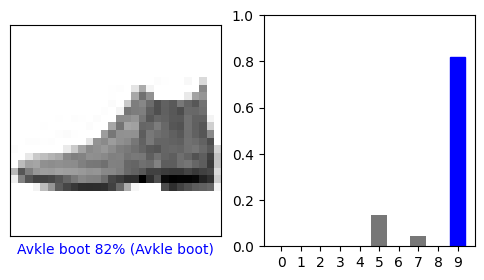

In [104]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)	# 전체 그래프를 1행 2열로 분리한 뒤 첫 번째 칸에 이미지를 배치함 
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2) 	# 전체 그래프를 1행 2열로 분리한 뒤 두 번째 칸에 이미지를 배치함
plot_value_array(i, predictions[i], test_labels)
plt.show()

여러 이미지의 분류 결과를 출력

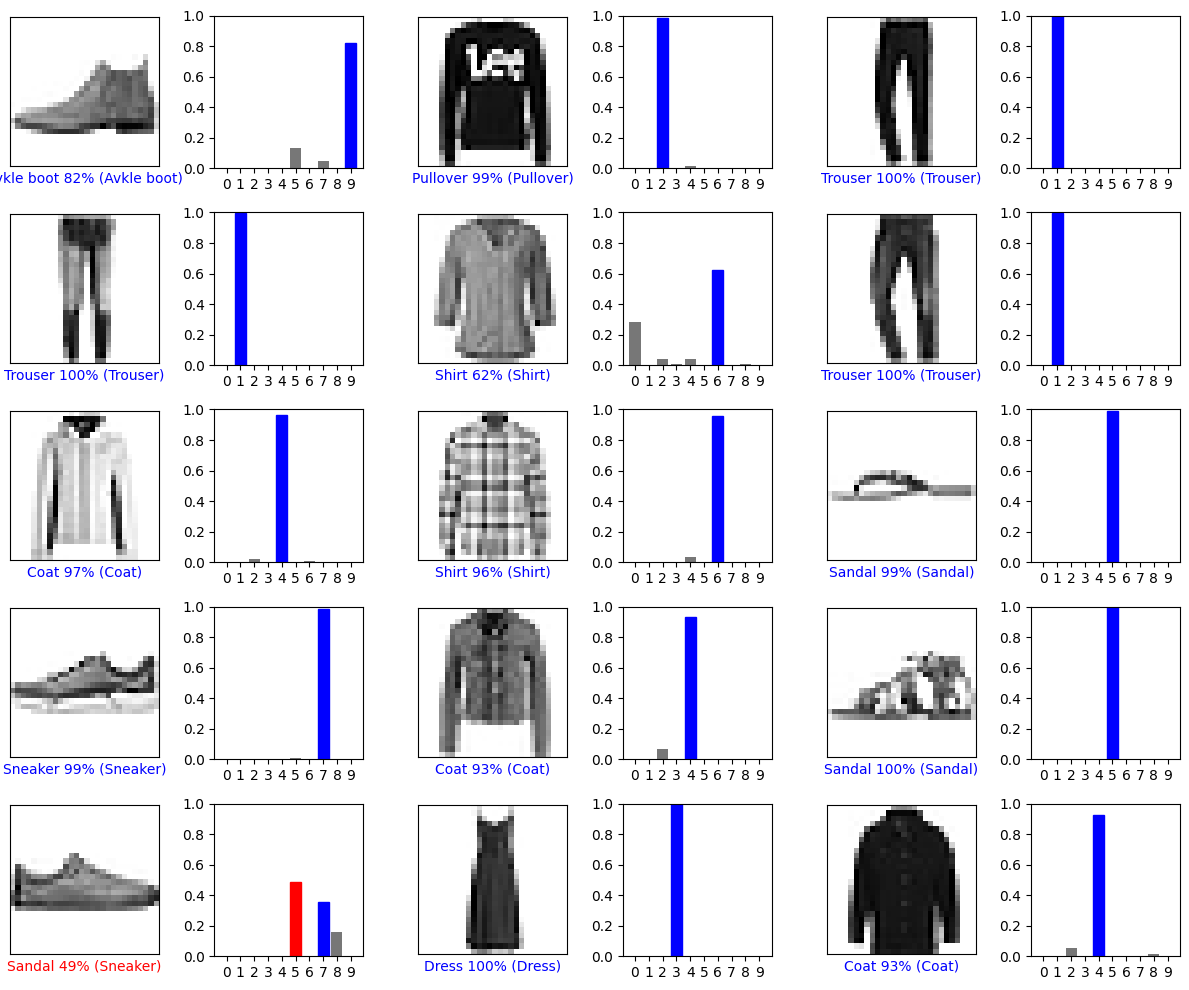

In [ ]:
num_rows = 5    # 5행
num_cols = 3    # 3열
num_images = num_rows*num_cols  # 표시할 이미지는 15세트
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()  # 레이블 등의 텍스트가 겹치지 않도록 자동으로 간격을 조정해줌
plt.show()